<a href="https://colab.research.google.com/github/prititaliya/Ensemble-/blob/main/Voting_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/sample_data/ushape.csv',header=None)

In [10]:
df

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0
...,...,...,...
95,1.699453,0.587720,1.0
96,0.218623,-0.652521,1.0
97,0.952914,-0.419766,1.0
98,-1.318500,0.423112,0.0


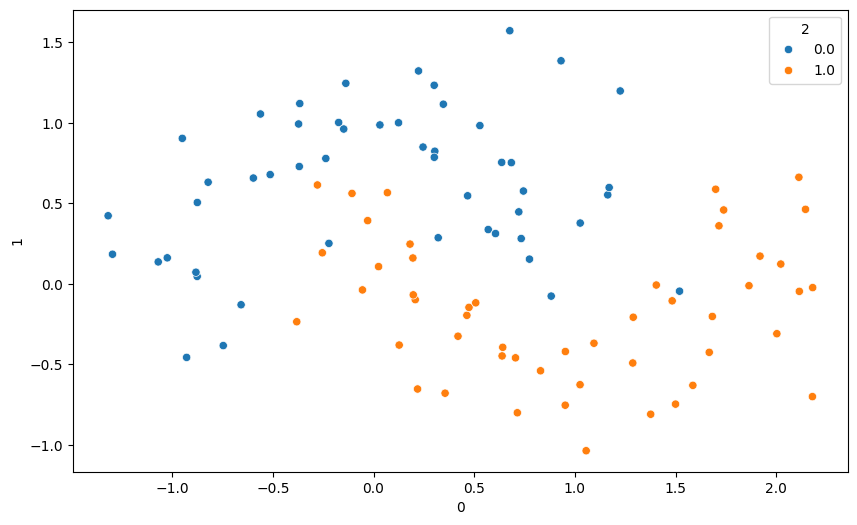

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=0,y=1,data=df,hue=2)
plt.show()

In [9]:
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(2,axis=1),df[2],test_size=0.3)
log_reg=LogisticRegression()

In [26]:
log_reg.fit(X_train,y_train)
pred=log_reg.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86        15
         1.0       1.00      0.67      0.80        15

    accuracy                           0.83        30
   macro avg       0.88      0.83      0.83        30
weighted avg       0.88      0.83      0.83        30



In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        15
         1.0       1.00      0.80      0.89        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



In [ ]:
log_parmas={
    'penalty':['l1','l2'],
    'C':np.logspace(-3,3,7),
    'solver':['newton-cg','lbfgs','liblinear']
}
log_grid=GridSearchCV(log_reg,log_parmas,cv=10)
log_grid.fit(X_train,y_train)

In [18]:
print(log_grid.best_params_)
print(log_grid.best_score_)

{'C': np.float64(1.0), 'penalty': 'l1', 'solver': 'liblinear'}
0.8428571428571429


In [19]:
dt_params={
    'criterion':['gini','entropy'],
    'max_depth':[2,4,6,8,10],
    'min_samples_split':[2,4,6,8,10]
}
dt_grid=GridSearchCV(dt,dt_params,cv=10)
dt_grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]})

In [20]:
print(dt_grid.best_params_)
print(dt_grid.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2}
0.9


In [21]:
from sklearn.ensemble import VotingClassifier

In [27]:
estimators=[('log_reg',log_reg),('dt',dt)]
vc=VotingClassifier(estimators,voting='hard')
vc.fit(X_train,y_train)
pred=vc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83        15
         1.0       1.00      0.60      0.75        15

    accuracy                           0.80        30
   macro avg       0.86      0.80      0.79        30
weighted avg       0.86      0.80      0.79        30



In [28]:
estimators=[('log_reg',log_reg),('dt',dt)]
vc=VotingClassifier(estimators,voting='soft')
vc.fit(X_train,y_train)
pred=vc.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94        15
         1.0       1.00      0.87      0.93        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



In [29]:
from mlxtend.plotting import plot_decision_regions

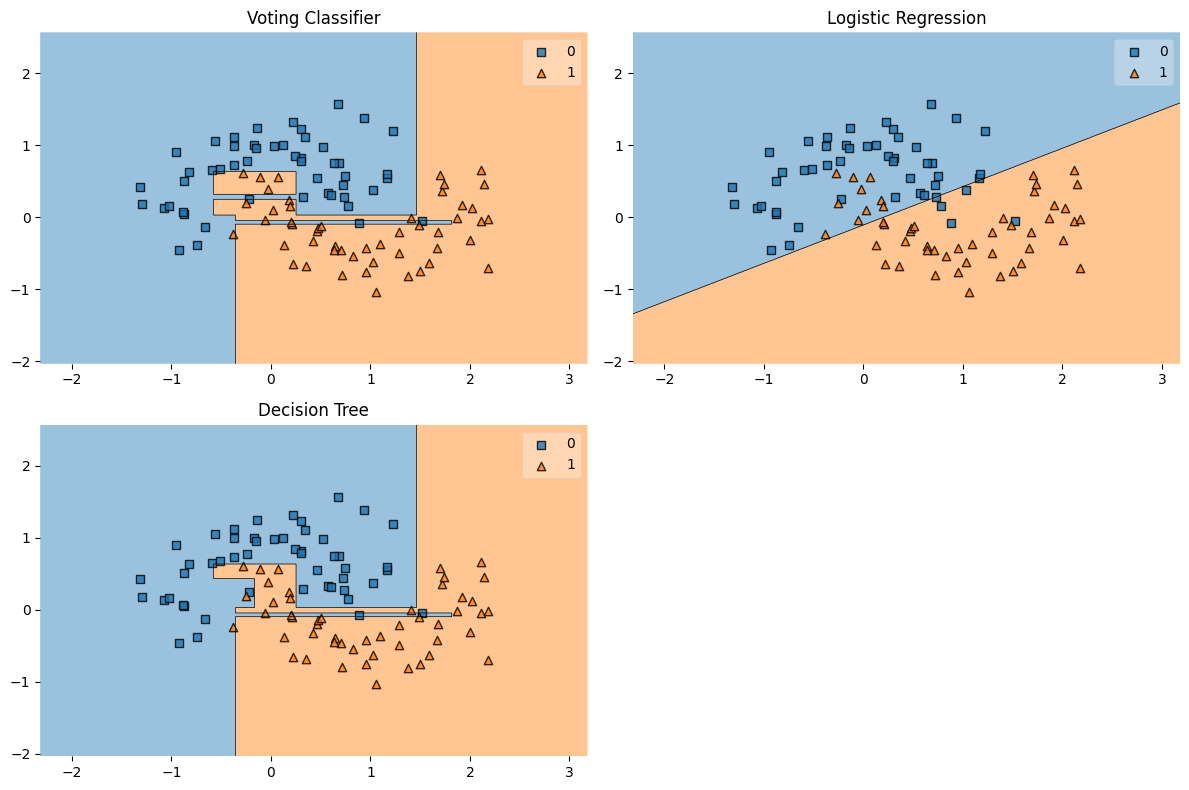

In [39]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plot_decision_regions(X=df.drop(2, axis=1).values[:, :2],
                      y=df[2].astype(np.int_).values,
                      clf=vc)
plt.title('Voting Classifier')

plt.subplot(2, 2, 2)
plot_decision_regions(X=df.drop(2, axis=1).values[:, :2],
                      y=df[2].astype(np.int_).values,
                      clf=log_reg)
plt.title('Logistic Regression')

plt.subplot(2, 2, 3)
plot_decision_regions(X=df.drop(2, axis=1).values[:, :2],
                      y=df[2].astype(np.int_).values,
                      clf=dt)
plt.title('Decision Tree')

plt.tight_layout()
plt.show()